In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

In [4]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
print(M)
M /= M.max()

[[82.83302061 74.55367164 76.63845562 ... 84.17101411 88.52292362
  82.21007794]
 [41.97213913 34.46279004 34.33532925 ... 44.519642   40.66852314
  37.54560074]
 [51.49899777 44.94437304 46.62304108 ... 52.71101534 56.1928335
  51.03215135]
 ...
 [37.31531811 33.280701   36.03763742 ... 37.30144106 45.9440826
  40.26461667]
 [18.34669198 15.2167084  17.01520189 ... 18.73131883 24.04933846
  19.95621977]
 [38.40146542 32.16726771 33.10062411 ... 40.00756022 40.75025335
  36.68609709]]


In [5]:
print(xs)
print(xt)

[[-2.64045816e+00 -1.76367071e+00]
 [ 6.27086455e-01 -9.74349151e-01]
 [-1.19005617e+00 -4.89802208e-01]
 [-1.10390714e+00 -3.20031936e-01]
 [-4.63268689e-01  2.96585541e-01]
 [-1.23947747e+00  3.09976936e-01]
 [-1.27782508e-01 -1.19777683e+00]
 [-9.52362417e-01  1.17325102e-01]
 [-2.69020245e-01  2.53192589e-01]
 [ 1.05846727e+00  7.67214807e-01]
 [ 2.04861342e-01  1.37130998e+00]
 [ 6.54807726e-01 -1.82079159e-01]
 [ 6.16322206e-01  4.70888864e-01]
 [-5.50625056e-02  1.62538797e-01]
 [-1.76305562e+00  1.28479872e+00]
 [ 1.07518798e+00 -1.70480899e+00]
 [ 2.49811996e+00  6.88201120e-01]
 [-4.81234136e-01 -1.14468004e+00]
 [-3.17640960e-01  4.59520561e-01]
 [-6.42953270e-01  7.65817633e-01]
 [-4.17834013e-01  1.53090371e+00]
 [ 1.90115927e-01 -4.50990570e-01]
 [-1.31971110e-01  7.92360077e-01]
 [ 1.01399691e+00 -9.46136559e-01]
 [-1.05495358e+00 -2.48536713e+00]
 [-1.18382556e+00  6.28429122e-01]
 [-1.21587111e+00  2.67049574e-01]
 [-8.25616461e-01 -6.90924208e-01]
 [-5.67649646e-02  7

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot

In [7]:
N = 3
d = 2
measures_locations = []
measures_weights = []

for i in range(N):

    n_i = np.random.randint(low=1, high=20)  # nb samples

    mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean

    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    print(x_i)
    b_i = np.random.uniform(0., 1., (n_i,))
    b_i = b_i / np.sum(b_i)  # Dirac weights

    measures_locations.append(x_i)
    measures_weights.append(b_i)

[[-1.67018451  2.44406891]
 [-1.9156664   2.35386939]
 [-1.8585871   2.35447996]
 [-2.20515416  2.24770278]
 [-0.11334889  2.95010283]
 [-1.6848012   2.45560405]
 [-0.99421269  2.68870931]
 [ 0.47373138  3.18364882]]
[[-0.85535738 -6.95077619]
 [-0.4756825  -5.12255158]
 [-1.00897221 -6.54478555]
 [ 0.34909402 -5.88705345]
 [-1.00733474 -6.60357398]
 [-0.36577508 -4.36549429]
 [-1.28698024 -7.03380433]
 [-1.68742061 -8.47727826]
 [-0.70294127 -5.145496  ]
 [ 0.40280477 -6.09203093]
 [-0.85386468 -6.06262624]
 [ 0.0455252  -6.31746164]
 [-1.32003615 -6.64344492]
 [-0.14903243 -7.18789171]]
[[ 3.31420605 -6.43117091]
 [ 2.56879272 -6.83299042]
 [ 2.97742134 -6.77921573]
 [ 2.57777735 -6.84766046]
 [ 3.29151795 -6.46355498]]


In [3]:
k = 10  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

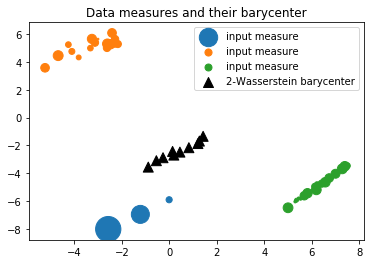

In [4]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], s=b_i * 1000, label='input measure')
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, c='black', marker='^', label='2-Wasserstein barycenter')
pl.title('Data measures and their barycenter')
pl.legend(loc=0)
pl.show()

In [5]:
print(measures_locations)

[array([[-2.57387195, -8.03229018],
       [-0.00974984, -5.91672915],
       [-1.22168077, -6.97144086]]), array([[-2.41484705,  6.10212482],
       [-2.60996293,  5.31491835],
       [-4.72024644,  4.45218573],
       [-2.48371726,  5.29002892],
       [-4.68193441,  4.46571253],
       [-2.22782883,  5.23099963],
       [-2.3304955 ,  5.78201735],
       [-2.62610573,  5.02412165],
       [-3.13553718,  5.40305972],
       [-3.81831707,  4.33637635],
       [-4.10532666,  4.76827469],
       [-2.16932609,  5.29991447],
       [-3.32543129,  5.005944  ],
       [-4.2523325 ,  5.25805082],
       [-3.00396351,  5.65706206],
       [-5.23461192,  3.58934297],
       [-2.28218163,  5.65771237],
       [-2.30756218,  5.39994322],
       [-3.25981942,  5.67039187]]), array([[ 6.21749977, -4.79711879],
       [ 6.41360754, -4.75882171],
       [ 7.28032471, -3.6886862 ],
       [ 5.29833221, -6.05062208],
       [ 7.38799213, -3.50418792],
       [ 7.49223856, -3.46837342],
       [ 5.4443

In [6]:
print(measures_weights)

[array([0.63805083, 0.03747334, 0.32447582]), array([0.0755655 , 0.09429956, 0.02386292, 0.09066909, 0.09790522,
       0.00960623, 0.02760119, 0.0542656 , 0.05520081, 0.02374137,
       0.0357083 , 0.05085383, 0.03175504, 0.03234218, 0.00302462,
       0.07429787, 0.05080175, 0.08399028, 0.08450866]), array([0.02402916, 0.05161748, 0.09658963, 0.00678565, 0.09071731,
       0.03545186, 0.00820113, 0.07960526, 0.07155463, 0.02480091,
       0.0006522 , 0.08758647, 0.09410406, 0.00906246, 0.07385423,
       0.09532565, 0.04320507, 0.09169725, 0.01515961])]


In [6]:
pwd

'/Users/carollong/Desktop'

In [7]:
ls

AnimaAnandkumar_.jpeg
BankOfKnowledge/
GlobalAwards/
GradApp1.xlsx
GradSchool/
Graduation Requirement.png
HomeDeco.png
NYUCourseSelection/
OptimalTransport/
PastProjects/
PersonalityTrait.png
QuantResearch.png
Resume-Carol Long.pdf
Resume:Recruit/
SURE2020/
Screen Shot 2019-11-06 at 9.40.55 PM.png
Screen Shot 2019-11-06 at 9.41.39 PM.png
Screen Shot 2020-03-14 at 10.32.37 PM.png
Screen Shot 2020-06-08 at 2.21.46 PM.png
Screen Shot 2020-06-22 at 10.08.58 AM.png
Screen Shot 2020-06-25 at 10.47.05 AM.png
Screen Shot 2020-07-07 at 4.21.43 PM.png
Screen Shot 2020-07-15 at 12.37.01 PM.png
Screen Shot 2020-07-17 at 2.20.46 PM.png
Screen Shot 2020-07-21 at 12.04.51 AM.png
Screen Shot 2020-07-21 at 12.05.07 AM.png
Screen Shot 2020-07-27 at 11.12.14 AM.png
Screen Shot 2020-07-27 at 11.14.14 AM.png
attentive-neural-algo/
freeSupportOutput.csv
trading/
tryOut.py
~$MFishModel_New_Q2.docx
~$okList.docx
~$sume-Carol Long-converted.docx
~$sume-Carol Long.docx


In [8]:
cd /Users/carollong/Desktop/OptimalTransport/Pneumonia/RunExperiments/Result

/Users/carollong/Desktop/OptimalTransport/Pneumonia/RunExperiments/Result


In [9]:
ls

bregmanbaryCovid.csv          bregmanbarystabCovid.csv
bregmanbaryNon.csv            bregmanbarystabNon.csv
bregmanbarysinkhornCovid.csv  convoCovid.csv
bregmanbarysinkhornNon.csv    convoNon.csv


In [16]:
import numpy
from numpy import genfromtxt
X = genfromtxt('convoCovid.csv', delimiter=',')
Y = genfromtxt('convoNon.csv', delimiter=',')

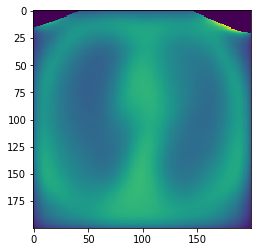

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X,vmin = 0, vmax = numpy.max(X))

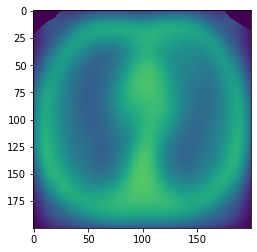

In [18]:
plt.imshow(Y,vmin = 0, vmax = numpy.max(X))

In [20]:
import numpy as np
bregmanCovid = genfromtxt('bregmanbaryCovid.csv', delimiter=',')
bregmanNon = genfromtxt('bregmanbaryNon.csv', delimiter=',')
bregmanCovid = np.reshape(bregmanCovid,(200,200))
bregmanNon = np.reshape(bregmanNon,(200,200))
print(bregmanNon)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Library/Frameworks/Python.framew

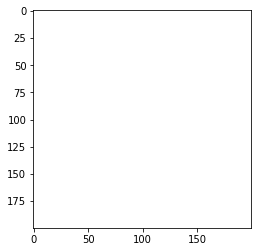

In [17]:
plt.imshow(bregmanNon)

In [20]:
pwd

'/Users/carollong/Desktop/OptimalTransport/Pneumonia/RunExperiments/Result'

In [21]:
cd /Users/carollong/Desktop

/Users/carollong/Desktop


In [22]:
from numpy import genfromtxt
Z = genfromtxt('freeSupportOutput.csv', delimiter=',')

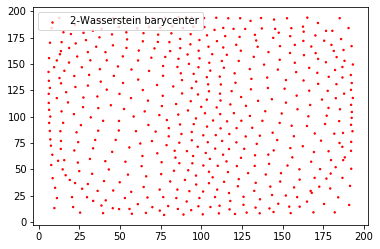

In [28]:
import matplotlib.pyplot as pl
import numpy
b = numpy.ones((500,)) / 500  # weights of the barycenter (it will not be optimized, only the locations are optimized)
pl.figure(3)
pl.scatter(Z[:, 1], Z[:, 0], s=b * 1000, c='red', label='2-Wasserstein barycenter')
pl.legend(loc=0)
pl.show()

(500, 2)